In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

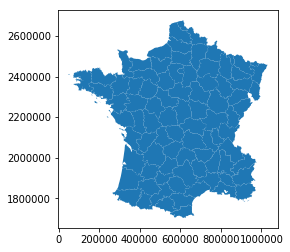

In [19]:
from libpysal import examples
import geopandas as gpd

datapath=examples.get_path('Guerry.shp')
gpdf=gpd.read_file(datapath)
gpdf.plot()

In [20]:
gpdf.head(1)

,CODE_DE,COUNT,AVE_ID_,dept,Region,Dprtmnt,Crm_prs,Crm_prp,Litercy,Donatns,...,Infntcd,Dntn_cl,Lottery,Desertn,Instrct,Prsttts,Distanc,Area,Pop1831,geometry
0,01,1.0,49.0,1,E,Ain,28870,15890,37,5098,...,60,69,41,55,46,13,218.372,5762,346.03,"POLYGON ((801150 2092615, 800669 2093190, 8006..."


In [21]:
y=gpdf['Donatns']

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d3c1e3af98>)

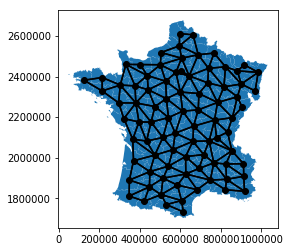

In [22]:
from libpysal.weights.contiguity import Queen

w=Queen.from_dataframe(gpdf)
ax=gpdf.plot()
w.plot(gpdf, ax=ax)

In [23]:
import libpysal as lps

ylag = lps.weights.lag_spatial(w, y)

In [24]:
b,a = np.polyfit(y,ylag,1)
print(b,a)

1.1379805342362124 24010.430686277905


In [25]:
w.transform='r'
ylag = lps.weights.lag_spatial(w, y)
b,a = np.polyfit(y,ylag,1)
print(b,a)

0.35336132558486083 4087.4522249716347


In [28]:
type(y),type(ylag)

(pandas.core.series.Series, numpy.ndarray)

In [12]:
import pysal.model as pymodel
yt = y.values
yt.shape = (len(y), 1)
ylagt = ylag
ylagt.shape = (len(ylag),1)

ols=pymodel.spreg.OLS(ylagt,yt)
print(ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:          85
Mean dependent var  :   6463.2127                Number of Variables   :           2
S.D. dependent var  :   2899.1622                Degrees of Freedom    :          83
R-squared           :      0.3514
Adjusted R-squared  :      0.3435
Sum squared residual:457964593.021                F-statistic           :     44.9589
Sigma-square        : 5517645.699                Prob(F-statistic)     :   2.278e-09
S.E. of regression  :    2348.967                Log likelihood        :    -779.345
Sigma-square ML     : 5387818.741                Akaike info criterion :    1562.690
S.E of regression ML:   2321.1675                Schwarz criterion     :    1567.575

----------------------------------------------------------------------------

In [14]:
from esda.moran import Moran

moran = Moran(y, w)
moran.I

0.3533613255848606

In [56]:
yarray=np.array(y.values).astype(float)
np.std(yarray)

4834.552352808016

In [57]:
np.std(ylag)

2882.0578370461317

In [68]:
np.corrcoef(yarray,ylag)

array([[1.       , 0.5927514],
       [0.5927514, 1.       ]])

In [69]:
from scipy.stats import pearsonr
pccs = pearsonr(yarray,ylag)
pccs

(0.5927514035417684, 2.2780143813978783e-09)